<a href="https://colab.research.google.com/github/Andron00e/CompMath/blob/main/%D0%A4%D0%B8%D0%B7%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

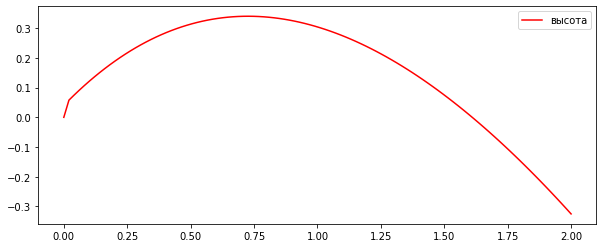

In [1]:
# Пусть тело имеет начальную скорость v0, начальный угол alpha с углом к горизонту
# Сопротивление воздуха -k*v,  k - коэффициент.

# Описание качественных характеристик. 
# Тело заменяем материальной точкой (размеры не важны)
# Используем модель сопротивления воздуха F = - k*v
# Рассматриваем исключительно механический процесс по второму закону Ньютона.
# Учитываем: силу тяжести, сопротивление воздуха, ограничиваемся только механикой

# Построение модели.
#  Составить уравнения, ввести систему координат
#  Ox:  m*ax = -k*vx ;  Oy:  m*ay = - -m*g - k*vy
#  vx(0) = v0*cos(alpha), vy(0) = vo*sin(alpha), x(0) = 0, y(0) = 0
#  Будем измерять все скорости относительно v0.  V = v/v0 - безразмерная.
# Единицу времени будем выражать как  v0/g. T  = t*g/v0
# X = x*g/v0^2  ,  Y = y*g/v0^2
# Обезразмерим уравнения (g = 1,  v0 = 1)
# m*ax = -k*vx ;   vx = Vx*v0,  ax = dvx/dt = dVx/dT * v0^2/g
#  dVx/dT * (m*g) = - k*Vx*v0
# dVx/dT = - Vx*(k*v0/(g*m))  # уравнение без размерностей.
# проверим размерность k*v0/(g*m) 
# H*c/м * м/c/ (кг*H/кг) = 1 . Обозначим А = k*v0/(g*m) 
# dVx/dT = - Vx*A - безразмерное уравнение (А - параметр без размерности)
# m*ay = - -m*g - k*vy ;  
# dVy/dT = - 1 - A*Vy  - безразмерное уравнение. 
# dX/dT = Vx;  dY/dt = Vy
# начальные условия тоже безразмерные. 
#  Vx(0) = cos(alpha), Vy(0) = sin(alpha)
# Законы сохранения
# Vy - Vy(0) = - T - A*y   (1)
# Vx - Vx(0) = - A*x         (2)

# Создадим численную модель. Чтобы законы сохранения не нарушались никогда,
# вместо вычисления скорости с помощью конечных разностей будем вычислять её из
# законов сохранения (1) и (2). Перейдём к конечным разностям.
# dVx/dT = - Vx(T)*A  .
# Vx(T+dT) = Vx(T) - Vx(T)*A*dT; Vx(T+dT) =   Vx(0) -  A*X(T+dT)
# Vx(0) -  A*X(T+dT) = Vx(T) - Vx(T)*A*dT

# Vy(T+dT) = Vy(T) - (Vy(T)*A + 1)*dT = Vy(0) -  A*Y(T+dT) - T
#  Y(T+dT) = (1/A)*( Vy(0) -  Vy(T) - T) + (Vy(T) + 1/A)*dT

# Эта система безразмерных уравнений, написанных с учётом законов сохранения, 
# позволяет решать задачу в наиболее общем виде и при этом накопление ошибки с
# течением времени не приводит к нарушению закона сохранения 
# (импульс силы, переданный внешними силами, равен изменению импульса точки)
# Здесь реализован первый способ учёта законов сохранения - они напрямую вшиты 
# в разностные уравнения.

# X(T+dT) = (1/A)*( Vx(0) -  Vx(T)) + Vx(T)*dT
# Vx(T+dT) =   Vx(0) -  A*X(T+dT)

# Y(T+dT) = (1/A)*( Vy(0) -  Vy(T) - T) + (Vy(T) + 1/A)*dT
# Vy(T+dT) =   Vy(0) -  A*Y(T+dT) - T

# С законом сохранения энергии ситуация более сложная. 
# Чтобы получить условие сохранения энергии, проинтегрируем по перемещению.
# dVy/dT = - 1 - A*Vy  ;  dVx/dT = - Vx(T)*A
#  Vy^2/2 - Vy(0)^2/2 = - y - A*integral(Vy*dy, y oт 0 до y(T))
#  Vx^2/2 - Vx(0)^2/2 = - A*integral(Vx*dx, x oт 0 до x(T))

# формулы для коррекции скорости. Переопределяем скорость 
# Vy(T)  = sign(Vy(T))*sqrt(Vy(0)^2/2 - y - A*integral(Vy*dy, y oт 0 до y(T)) )
# Vx(T)  = sign(Vx(T))*sqrt(Vx(0)^2/2  - A*integral(Vx*dx, x oт 0 до x(T)) )

'''
Интегралы
integral(Vy*dy, y oт 0 до y(T)) ) 
integral(Vx*dx, x oт 0 до x(T))

Можно вычислять не каждый раз заново, а суммировать по ходу выполнения программы.

V(T) входит не только в sign, это значение используется и в вычислении интеграла.

В таких случаях скорости переопределяют не каждый раз, а лишь по мере накопления
ошибки - либо раз в какое-то количество шагов по времени, либо через оценку
накопленной ошибки.
'''
'''
N = 1000; A = 0.1
 
gridt = np.linspace(0, 2, N)  # задаем сетку для построения графика плотности
dT = gridt[1] - gridt[0]
'''
# X(T+dT) = (1/A)*( Vx(0) -  Vx(T)) + Vx(T)*dT
# Vx(T+dT) =   Vx(0) -  A*X(T+dT)

# Y(T+dT) = (1/A)*( Vy(0) -  Vy(T) - T) + (Vy(T) + 1/A)*dT
# Vy(T+dT) =   Vy(0) -  A*Y(T+dT) - T

# Vy - Vy(0) = - T - A*y   (1)
# Vx - Vx(0) = - A*x         (2)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def raschet(Vx0, Vy0 , A, N):
  gridt = np.linspace(0, 2, N) 
  dT = gridt[1] - gridt[0]
  X, Y, Vx, Vy = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
  Vx[0] , Vy[0] = Vx0 , Vy0 # 0.5,  (3**0.5)/2
  for i in range(N-1):
    T = gridt[i]
    X[i + 1] = (1/A)*( Vx[0] -  Vx[i]) + Vx[i]*dT
    Vx[i + 1] =   Vx[0] -  A*X[i + 1]
    Y[i + 1] = (1/A)*( Vy[0] -  Vy[i] - T) + (Vy[i] + 1/A)*dT
    Vy[i + 1] =   Vy[0] -  A*Y[i + 1] - T
  plt.figure(figsize=(10, 4))
  #plt.scatter(sample, np.zeros(200) - 0.02, alpha=0.2, label='sample')  # label - описание в легенде
  plt.plot(gridt, Y , color='red', label='высота')  # color - цвет графика
  plt.legend()  # добавляет легенду
  plt.show()

# При малых А считает плохо.  
# Можно при малых А учитывать закон сохранения иначе
# Например, задав это условием в программе.
# dX/dT = Vx;  dY/dt = Vy  - решать эти уравнения, а Vx, Vy по закону сохранения
# можно исследовать другие варианты.
# как устранить аномалию в начале графика? Например, писать уравнения, учитывающие
# закон сохранения, не с первых моментов. 

raschet(0.5, (3**0.5)/2, 0.5, 100)




Пусть материальная точка имеет массу m и закреплена на пружине жёсткостью k. Уравнение движения имеет вид:  ma = - k*x,  х - отклонение от положения равновесия. Законы сохранения: только сохранение энергии.
m*v^2/2 + k*x^2/2 = E = const = m*v0^2/2 + k*x0^2/2 .
Обезразмерим уравнение. 
Сначала посмотрим, какие размерные параметры есть в задаче. 
k - жёсткость пружины, Н/м
m - масса, кг
x0 - начальная координата, м
v0 - начальная скорость, м/c

Удобнее всего так выбирать безразмерные параметры, чтобы от тех параметров, которые мы меняем, зависело как можно меньше. 
При этом начальные условия не следует брать за единицу.

a = -(k/m)*x,  ввести параметр w^2 = k/m, w = sqrt(k/m) (1/сек).

За единицу можно взять либо значение какого-то из параметров задачи, либо размерную единицу (например, пусть длина 1 метр будет равна 1).
Килограмммы уже не нужны (сократились вместе с ньютонами в k/m), а метры и секунды можно заменять по-разному.
В качестве безразмерной единицы берём w (обратное время). 
Нужна вторая безразмерная единица. Можно взять просто единицу расстояния и или скорости. Рассмотрим энергию, делённую на массу.

E/m = v0^2/2 + w^2*x0^2/2 . Но мы уже приняли w^2 = 1. 

Возьмём за единицу: 1 = v0^2 + w^2*x0^2 = 2*E/m. 

Теперь в обезразмеренном виде следует записать начальные условия и сами уравнения. В качестве единицы скорости берём sqrt(2E/m).
В качестве единицы координаты берём sqrt(2E/mw^2).
Новые безразмерные переменные и параметры будем записывать большими буквами. X0 = x0/sqrt(2E/mw^2) , V0 = v0/sqrt(2E/m).

Единица ускорения будет равна: sqrt(2E*w^2/m)
a = -w^2*x
A/sqrt(2E*w^2/m) = - w^2*X/sqrt(2E/mw^2);  A = - X
sqrt(2E*w^2/m)*w^2/sqrt(2E/mw^2) = 1  - всё правильно. 

d^X/dt^2 = - X; При этом w^2 = 1,  2E/m = 1 (новые единицы).
X0 = x0/sqrt(2E/mw^2) , V0 = v0/sqrt(2E/m).

Получилось уравнение без параметров, начальные условия безразмерные.
Это простой случай, так как исчезли не только размерные параметры, но и вообще параметров в уравнении не осталось.

Единица координаты соответствует sqrt(2E/mw^2).
Единица скорости соответствует  sqrt(2E/m).

Закон сохранения: X^2 + V^2 = X0^2 + V0^2 = 1. 
С учётом этого можно упростить даже начальные условия. 
X0 = cos(f),  Y0 = sin(f),  f - начальная фаза. 

Исследовать параметры можно либо чисто математически (как здесь), либо исходя из физических соображений. Часто комбинируют одно с другим.

Сведём дифференциальное уравнение второго порядка к двум уравнения первого.

dV/dt = - X;  dX/dt = V 

Здесь проще учесть закон сохранения, заменив переменные на другие. 

Тогда f(t) - будет новой функцией. Программа будет вычислять f(t), а затем вычислять на её основе X и Y. Таким образом, независимо от того, какой вид будет иметь функция f, закон сохранения энергии будет соблюдаться всегда.
X = cos(f),  dX/dt = -df/dt*sin(f) = sin(f);  -df/dt = 1
dV/dt = df/dt*cos(f) = -cos(f);  -df/dt = 1 

f(t+dt) = f(t) - dt // точное решение совпадёт с численным и оно будет иметь вид f(t) = f0 - t.
X(t) = cos(f0 - t);  V(t) = sin(f0 - t).

В данном случае удалось даже численно получить точное решение (ошибка будет связана не с методом решения, а только с округлением).

Теперь попробуем решить задачу без учёта упрощающих соображений (введения f) и без учёта закона сохранения энергии. 

dV/dt = - X;  dX/dt = V , X(0),  V(0) даны.

Уравнения методом Эйлера:  
V(t+dt) = V(t) - X(t)*dt;  X(t+dt) = X(t) + V(t)*dt






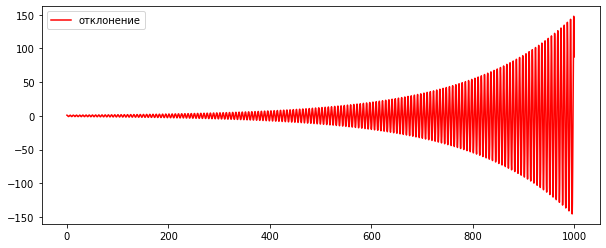

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def raschetkm(X0, V0 , N):
  gridt = np.linspace(0, N/100, N) 
  dT = gridt[1] - gridt[0]
  X,  V = np.zeros(N), np.zeros(N)
  X[0] , V[0] = X0 , V0 
  for i in range(N-1):
    T = gridt[i]
    X[i + 1] = X[i] + V[i]*dT
    V[i + 1] =  V[i] -  X[i]*dT
  plt.figure(figsize=(10, 4))
#plt.scatter(sample, np.zeros(200) - 0.02, alpha=0.2, label='sample')  # label - описание в легенде
  plt.plot(gridt, X , color='red', label='отклонение')  # color - цвет графика
  plt.legend()  # добавляет легенду
  plt.show()

raschetkm(1, 0 , 100000)


Как видим, вместо гармонических колебаний мы наблюдаем, что период колебаний всё время растёт. 
Теперь решим задачу без упрощающего соображения, но с учётом закона сохранения энергии.  X^2 + V^2 = X0^2 + V0^2 = 1

Одно из уравнений V(t+dt) = V(t) - X(t)*dt;  X(t+dt) = X(t) + V(t)*dt 
должно быть заменено на закон сохранения энергии. 
Проще говоря, можно либо заменить первое, либо заменить второе. Для определения правильного знака V(t+dt) будем сначала считать знак выражения  V(t) - X(t)*dt.  

Важно!  
Нужно очень аккуратно следить, к чему ведёт учёт закона сохранения в самом начале, так как закон сохранения - это интеграл движения, а в самом начале используется очень мало точек.

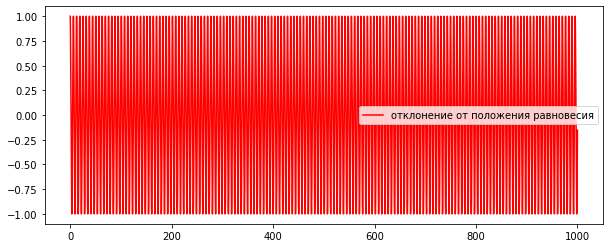

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def sign(X):
  if X > 0:
    return 1
  elif X < 0:
    return -1
  return 0

def raschetkm2(X0, V0 , N):
  gridt = np.linspace(0, N/100, N) 
  dT = gridt[1] - gridt[0]
  X,  V = np.zeros(N), np.zeros(N)
  X[0] , V[0] = X0 , V0 
  for i in range(N-1):
    T = gridt[i]
    X[i + 1] = X[i] + V[i]*dT
    V[i + 1] =  V[i] -  X[i]*dT
    if V[i] != 0:  # учёт ошибки из-за закона сохранения
      V[i + 1] = sign(V[i + 1])*(abs(1 - X[i+1]**2)**0.5)
  plt.figure(figsize=(10, 4))
#plt.scatter(sample, np.zeros(200) - 0.02, alpha=0.2, label='sample')  # label - описание в легенде
  plt.plot(gridt, X , color='red', label='отклонение от положения равновесия')  # color - цвет графика
  plt.legend()  # добавляет легенду
  plt.show()


raschetkm2(1, 0 , 100000)

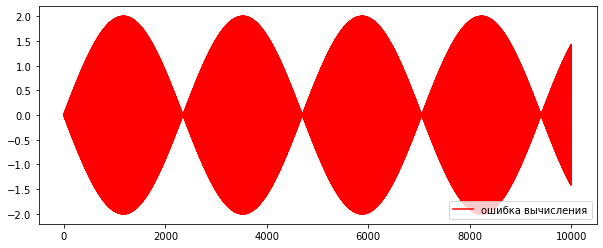

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def sign(X):
  if X > 0:
    return 1
  elif X < 0:
    return -1
  return 0

def raschetkm2(X0, V0 , N):
  gridt = np.linspace(0, N/100, N) 
  dT = gridt[1] - gridt[0]
  X,  V = np.zeros(N), np.zeros(N)
  X[0] , V[0] = X0 , V0 
  for i in range(N-1):
    T = gridt[i]
    X[i + 1] = X[i] + V[i]*dT
    V[i + 1] =  V[i] -  X[i]*dT
    if V[i] != 0:  # учёт ошибки из-за закона сохранения
      V[i + 1] = sign(V[i + 1])*(abs(1 - X[i+1]**2)**0.5)
  plt.figure(figsize=(10, 4))
#plt.scatter(sample, np.zeros(200) - 0.02, alpha=0.2, label='sample')  # label - описание в легенде
  plt.plot(gridt, X - np.cos(gridt) , color='red', label='ошибка вычисления')  # color - цвет графика
  plt.legend()  # добавляет легенду
  plt.show()


raschetkm2(1, 0 , 1000000)

В данном случае в некоторых особых ситуациях (например, X = 1, V = 0) закон сохранения останавливает изменения на графике. Это обойти можно, например, задав условие - в этих случаях не учитывать закон сохранения.

Следующий шаг в разработке модели - оптимизация.
1) как считать быстрее
2) как уменьшить ошибку.

График ошибки будет сильно зависеть и от задачи, и от метода расчёта, и даже от величины дискретизации. 

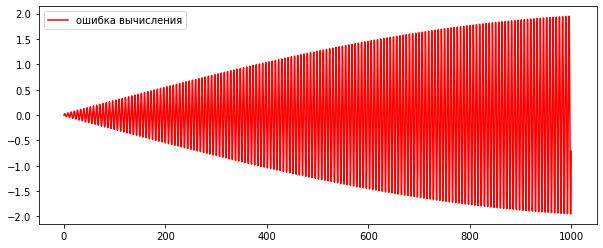

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def sign(X):
  if X > 0:
    return 1
  elif X < 0:
    return -1
  return 0

def raschetkm2(X0, V0 , N):
  gridt = np.linspace(0, N/100, N) 
  dT = gridt[1] - gridt[0]
  X,  V = np.zeros(N), np.zeros(N)
  X[0] , V[0] = X0 , V0 
  for i in range(N-1):
    T = gridt[i]
    X[i + 1] = X[i] + V[i]*dT
    V[i + 1] =  V[i] -  X[i]*dT
    if V[i] != 0:  # учёт ошибки из-за закона сохранения
      V[i + 1] = sign(V[i + 1])*(abs(1 - X[i+1]**2)**0.5)
  plt.figure(figsize=(10, 4))
#plt.scatter(sample, np.zeros(200) - 0.02, alpha=0.2, label='sample')  # label - описание в легенде
  plt.plot(gridt, X - np.cos(gridt) , color='red', label='ошибка вычисления')  # color - цвет графика
  plt.legend()  # добавляет легенду
  plt.show()


raschetkm2(1, 0 , 100000)

Построим пользовательский интерфейс для задачи решения системы дифференциальных уравнений:
$$
\left\{\begin{array}{l}
\frac{d x(t)}{d t}=\alpha x-\beta x y \\
\frac{d y(t)}{d t}=-\gamma y+\delta x y
\end{array}\right.
$$
С начальными условиями $x(0)=q, y(0)=r$. 

В пользовательский интерфейс внесем $\alpha, \beta, \gamma, \delta, q, r$, tmax - времени интегрирования, $\mathrm{n}$ - число разбиений временного интервала. Сверстаем в два столбца, отображаем фазовый портрет у(х). 

Анимируем фазовый портрет от времени. Сделаем так, чтобы можно было бы исследовать портрет при различных значениях параметров.

https://github.com/nastyPie/SciCalc/blob/main/part2/3_3.ipynb  

много похожих примеров тут https://github.com/nastyPie/SciCalc/tree/main/part2 

In [6]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from ipywidgets import widgets
from time import sleep


def rh(y, t, alpha, betta, gamma, delta):
    return alpha*y[0] - betta*y[0]*y[1], -gamma*y[1] + delta*y[0]*y[1]


def main(*args):
    tmax = w_tmax.value
    n = w_n.value
    alpha = w_alpha.value
    betta = w_betta.value
    gamma = w_gamma.value
    delta = w_delta.value
    q = w_q.value
    r = w_r.value
    t = np.linspace(0, w_tmax.value, n)
    y0 = (q, r) # начальные условия
    y = odeint(rh, y0, t, args=(alpha, betta, gamma, delta))
    with out2:
        clear_output(wait=True)
        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111)
        ax.plot(y[:,0], y[:,1], 'k-', lw=2)
        plt.show()
        
        
out1 = widgets.Output(layout={'width': '50%'})
out2 = widgets.Output(layout={'width': '50%'})
w_tmax = widgets.FloatSlider(description='tmax ', min=10, max=100, step=1, value=60)
w_n = widgets.IntSlider(description='Число шагов ', min=10, max=1000, step=1, value=1000)
w_alpha = widgets.FloatSlider(description='alpha ', min=-100, max=100, step=0.1, value=1)
w_betta = widgets.FloatSlider(description='betta ', min=-100, max=100, step=0.1, value=1)
w_gamma = widgets.FloatSlider(description='gamma ', min=-100, max=100, step=0.1, value=1)
w_delta = widgets.FloatSlider(description='delta ', min=-100, max=100, step=0.1, value=1)
w_q = widgets.FloatSlider(description='q ', min=-100, max=100, step=0.1, value=1)
w_r = widgets.FloatSlider(description='r ', min=-100, max=100, step=0.1, value=0.6)
w_button = widgets.Button(description='Запустить', button_style='primary')
w_button.on_click(main)
display(widgets.HBox([out1, out2]))
with out1:
    display(w_tmax,
            w_n,
            w_alpha,
            w_betta,
            w_gamma,
            w_delta,
            w_q,
            w_r,
            w_button,)

In [7]:
def run(*args):
    delay = w_delay.value
    tmax = w_tmax.value
    n = w_n.value
    alpha = w_alpha.value
    betta = w_betta.value
    gamma = w_gamma.value
    delta = w_delta.value
    q = w_q.value
    r = w_r.value
    t = np.linspace(0, w_tmax.value, n)
    y0 = (q, r) # начальные условия
    y = odeint(rh, y0, t, args=(alpha, betta, gamma, delta))
    with out4:
        for i in range(0, len(y), len(y)//200):
            clear_output(wait=True)
            plt.figure(figsize=(7, 7))
            plt.title('Фазовый портрет')
            plt.xlim((np.min(y[:, 0])-0.1, np.max(y[:, 0]+0.1)))
            plt.ylim((np.min(y[:, 1])-0.1, np.max(y[:, 1]+0.1)))
            plt.plot(y[:i, 0], y[:i, 1], color='black', lw=2)
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()
            sleep(delay)


out3 = widgets.Output(layout={'width': '50%'})
out4 = widgets.Output(layout={'width': '50%'})
w_delay = widgets.FloatSlider(description='Задержка ', min=0, max=1, step=0.01, value=0.01)
w_button = widgets.Button(description='Запустить', button_style='primary')
w_button.on_click(run)
display(widgets.HBox([out3, out4]))
with out3:
    display(w_delay,
            w_button)